## Creacion y solucion del sistema  formado por:

$-\delta_{n,\sigma} = -(w-E_0+i\eta)g^r_{n,\xi\sigma} + \gamma\left(
e^{i\theta}g^r_{n+(N+1),\xi\sigma}+e^{-i\theta}g^r_{n+(N-1),\xi\sigma}\right) + \frac{i\lambda_{EO}}{2}\nu\xi g^r_{n+(N+2),\xi\sigma} + \frac{i\lambda_R}{2}e^{-i\xi\sigma\psi}\left(g^r_{n+(N-1),-\xi\sigma}-g^r_{n+(N+1),-\xi\sigma}
\right)$

con el argumento de periodicidad:  $g^r_{N+n,\xi\sigma}=g^r_{n,\xi\sigma}$


Veamos cada los valores que acompanan a cada termino por separado:

$(t_0) \rightarrow g^r_{n,\xi\sigma}$

$(t_1) \rightarrow g^r_{n+(N+1),\xi\sigma}$ 

$(t_2) \rightarrow g^r_{n+(N-1),\xi\sigma}$ 

$(t_3) \rightarrow g^r_{n+(N+2),\xi\sigma}$ 

$(t_4) \rightarrow g^r_{n+(N-1),-\xi\sigma}$ 

$(t_5) \rightarrow g^r_{n+(N+1),-\xi\sigma}$

El punto es crear un sistema algebraico del tipo $Ag^r=B$ y resolver para $g^r$

In [103]:
import numpy as np
import matplotlib.pyplot as plt 

In [104]:
N = 4 # numero de sitios
gamma = 1
theta = 0
nu = 1
l_R = 0
l_EO = 0
sigma = 1
E0 = 0
KbT = 1
w = 1
eta = 1.0E-4
e = 1
c = 1
h = 1
phi_0 = c*h/e
phi = phi_0/N
theta = 2*np.pi*phi/N
psi = 2*np.pi/N
mu = 1


In [105]:
def fila(n,xi,w,theta,psi):
    '''
    Esta función crea cada fila (cada ecuación)
    n indica el sitio en cuestión
    '''
    A = np.zeros(2*N,dtype=complex)
    # evaluemos cada termino
    if xi==1: i = 0
    else: i = N
    A[n-1+i] += -(w-E0+eta*1.0j) # t0
    k = N+1
    l = (n+k)%N
    if(l==0): l=N 
    A[l-1+i] += gamma*np.exp(theta*1j) # t1
    k = N-1
    l = (n+k)%N
    if(l==0): l=N 
    A[l-1+i] += gamma*np.exp(-theta*1j) # t2 
    k = N+2
    l = (n+k)%N
    if(l==0): l=N 
    A[l-1+i] += l_EO*nu*xi*0.5j # t3
    if xi==1: i = N
    else: i = 0
    k = N-1
    l = (n+k)%N
    if(l==0): l=N 
    A[l-1+i] += l_R*np.exp(-xi*sigma*psi*1j)*0.5j  # t4
    k = N+1
    l = (n+k)%N
    if(l==0): l=N
    A[l-1+i] += -l_R*np.exp(-xi*sigma*psi*1j)*0.5j # t5    
    return A

def matrix_A(w,theta,psi):
    '''
    Esta función crea la matriz completa con los valores de xi=1 
    y luego con los valores de xi=-1, en ese orden
    '''
    A = np.matrix(np.empty(shape=(0,2*N), dtype=complex))
    for n in range(1,N+1):  
        a1 = fila(n,1,w,theta,psi)
        A = np.insert(A,(n-1),a1,axis=0)
    for n in range(1,N+1):  
        a1 = fila(n,-1,w,theta,psi)
        A = np.insert(A,(n-1)+N,a1,axis=0)
    return A


A = matrix_A(w,theta,psi)
#print(A)

In [106]:
G = np.dot(np.linalg.inv(A),B)
G = np.asarray(G).ravel()

# Los valores de G[0]=g_1,1  G[1] = g_2,1, ... G[N/2] = g_1,-1 ... G[-1] = g_N,-1
print(G)
#print(np.dot(A,G)) #chequeo de q lo resuelve correctamente!!

[ 0.99999981-4.99999917e-04j -0.38312952-9.23911042e-01j
 -1.41421336+4.24263987e-04j -0.38223734+9.23847637e-01j
  0.        +0.00000000e+00j  0.        +0.00000000e+00j
  0.        +0.00000000e+00j  0.        +0.00000000e+00j]


# Calculo de la densidad de Corriente J

$J_c = \frac{ie}{N}\left[2i\gamma \mathcal{Real}\left(e^{i\theta}g^{<}_{2\sigma,1\sigma}\right) 
+\lambda_{EO}\nu_n\sigma g^{<}_{3\sigma,1\sigma} - \frac{\lambda_R}{2}
e^{-i\sigma\phi}\left(g^{<}_{2(-\sigma),1\sigma}+g^{<}_{N(-\sigma),1\sigma}\right)\right]$

con 

$g^{<}(w)=\frac{2i\mathcal{Ima}(g^r)}{e^{\beta w}+1}$

En este caso tomare como $g^r$ los obtenidos numericamente de la resolucion del sistema AG=B


In [107]:
def den_corr(G,w,theta,psi):
    '''
    Calculo de la densidad de corriente
    '''
    a1 = 2j*G[1].imag/(np.exp(w/KbT)+1) # G[2,1]
    a2 = 2j*G[2].imag/(np.exp(w/KbT)+1) # G[3,1]
    a3 = 2j*G[N+1].imag/(np.exp(w/KbT)+1) # G[2,-1]
    a4 = 2j*G[-1].imag/(np.exp(w/KbT)+1) # G[N,-1]
    tt = (l_R/2.0)*np.exp(-1j*sigma*psi)*(a3+a4)
    b  = np.exp(theta*1j)*a1
    Jc = (1j*e/N)*(2j*gamma*b.real + l_EO*nu*sigma*a2 - tt)
    return Jc

In [108]:

Jc = den_corr(G,w,theta,psi)
Jc

(-0.09508839433053773+0j)

## Densidad espectral

$
\rho(w) = -\frac{1}{\pi}\mathcal{Ima}(g^r_{1,1})
$



In [109]:
def den_espectral(G):
    return -G[0].imag/np.pi


- - - 
## Grafiquemos $\rho(w)$ vs $w$

In [110]:

def rho_w(w_0,w_f,nw):
    w1 = np.linspace(w_0,w_f,nw)
    Den = np.array([],dtype=complex)
    for w in w1:
        A = matrix_A(w,theta,psi)       # creamos la matriz A
        B = np.zeros(2*N,dtype=complex) # creamos el vector B
        B[0] = -1
        G = np.dot(np.linalg.inv(A),B)  # Resolvemos el sistema AG=B
        G = np.asarray(G).ravel()
        Den = np.append(Den,den_espectral(G)) # calculamos densidad espectral
    return w1, Den


Text(0, 0.5, '$\\rho$')

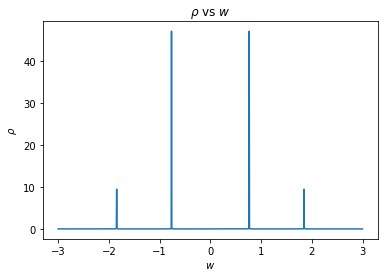

In [111]:
l_R = 0.0
l_EO = 0.0

w1,Den_esp = rho_w(-3,3,1000)
plt.plot(p,Den_esp.real) # grafico la densidad espectral
plt.title("$\\rho$ vs $w$")
plt.xlabel("$w$")
plt.ylabel("$\\rho$")

## Grafiquemos $J_c(w)$ vs $w$

In [112]:

def Jc_w(w_0,w_f,nw):
    w1 = np.linspace(w_0,w_f,nw)
    Jc = np.array([],dtype=complex)
    for w in w1:
        A = matrix_A(w,theta,psi)       # creamos la matriz A
        B = np.zeros(2*N,dtype=complex) # creamos el vector B
        B[0] = -1
        G = np.dot(np.linalg.inv(A),B)  # Resolvemos el sistema AG=B
        G = np.asarray(G).ravel()
        Jc = np.append(Jc,den_corr(G,w,theta,psi)) # calculamos densidad espectral
    return w1, Jc


Text(0, 0.5, '$J_c$')

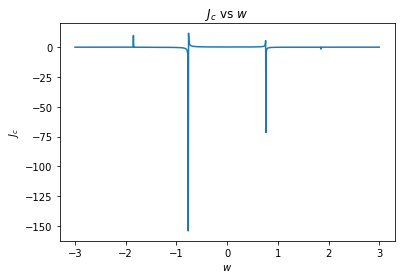

In [113]:
l_R = 0.0
l_EO = 0.0

w1,Den_corr = Jc_w(-3,3,1000)
plt.plot(p,Den_corr.real) # grafico la densidad de corriente
plt.title("$J_c$ vs $w$")
plt.xlabel("$w$")
plt.ylabel("$J_c$")